In [480]:
import numpy  as np
import pandas as pd
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [481]:
with h5py.File('data.h5', 'r') as hf:
    X = hf['EEG_values'][:]             #Samples tensor
    y = hf['target_values'][:]          #Targets matrix

In [482]:
X.shape

(2444, 640, 14)

In [483]:
No_Activity_Events = np.where(y==0)[0]
len(No_Activity_Events)

1194

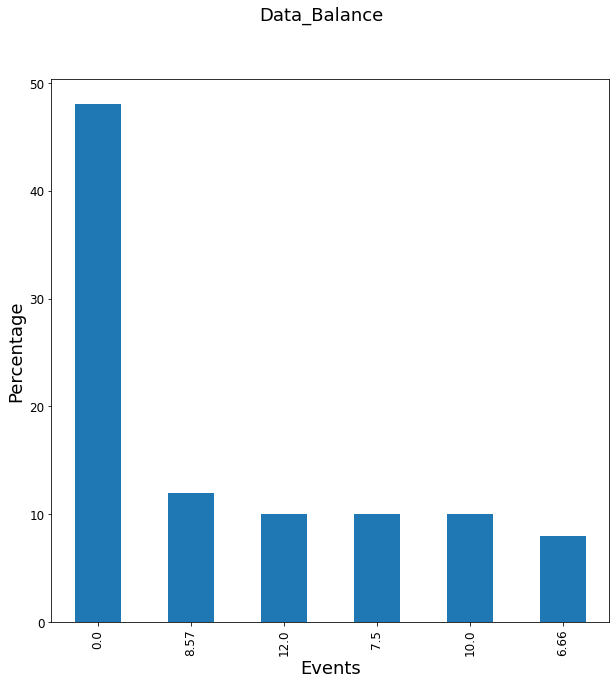

In [484]:
No_Activity_Events = np.where(y==0)[0]
len(No_Activity_Events)
Events = pd.Series(y).to_frame().rename(columns={0: "Events"})['Events'].astype(str)
type_counts = Events.value_counts()
Coutns = type_counts.sum(axis = 0)
for i in range(len(type_counts)):
    type_counts.iloc[i] = int((type_counts.iloc[i]/Coutns)*100)
ax =type_counts.plot(kind='bar' , figsize =(10,10)  , fontsize = 12);
plt.suptitle('Data_Balance', fontsize=18);
plt.ylabel('Percentage', fontsize=18);
plt.xlabel('Events', fontsize=18);

In [485]:
'''list_=[]
for i in range (0, len(No_Activity_Events), 2):
    list_ = list_ + [No_Activity_Events[i]]
y = np.delete(y, list_, 0)
X = np.delete(X, list_, 0)
No_Activity_Events = np.where(y==0)[0]
list_=[]
for i in range (0, len(No_Activity_Events), 2):
    list_ = list_ + [No_Activity_Events[i]]
y = np.delete(y, list_, 0)
X = np.delete(X, list_, 0)
No_Activity_Events = np.where(y==0)[0]
len(No_Activity_Events)'''

'list_=[]\nfor i in range (0, len(No_Activity_Events), 2):\n    list_ = list_ + [No_Activity_Events[i]]\ny = np.delete(y, list_, 0)\nX = np.delete(X, list_, 0)\nNo_Activity_Events = np.where(y==0)[0]\nlist_=[]\nfor i in range (0, len(No_Activity_Events), 2):\n    list_ = list_ + [No_Activity_Events[i]]\ny = np.delete(y, list_, 0)\nX = np.delete(X, list_, 0)\nNo_Activity_Events = np.where(y==0)[0]\nlen(No_Activity_Events)'

In [486]:
#Input tensor X as shape of M: Samples , ni: length of time sereis , m: Numper of features 

In [492]:
Index_Samples             = 0
Index_length_time_sereis  = 1
Index_features            = 2

#mean of each sample per m features cross ni length
mean_vector_i = tf.divide(tf.reduce_sum(X, Index_length_time_sereis), X.shape[Index_length_time_sereis])
#This result in tensor of shape (M , m)

#Now broad castting the tensor intp (M, ni ,m)
mean_vector_i = np.tile(mean_vector_i, (1,X.shape[Index_length_time_sereis])).reshape(X.shape[Index_Samples],
                                                                                      X.shape[Index_length_time_sereis],
                                                                                      X.shape[Index_features])

X_normalized  = tf.subtract(X,mean_vector_i)

<tf.Tensor: shape=(2444, 640, 14), dtype=float32, numpy=
array([[[ -2.9291992 ,  -9.145508  , -11.346191  , ...,  -6.840332  ,
         -36.887207  , -12.262207  ],
        [  0.66308594,   0.08349609,  -6.7314453 , ...,  -0.6826172 ,
         -33.302246  ,   2.6069336 ],
        [ 15.533203  ,  23.162598  ,  12.247559  , ...,  12.133789  ,
         -14.838379  ,  25.172363  ],
        ...,
        [  3.2250977 ,   4.697754  ,   4.553711  , ...,  -4.2753906 ,
           3.6254883 ,  -6.626465  ],
        [ -0.3671875 ,   2.6469727 ,  -3.6523438 , ...,  -2.2202148 ,
          12.857422  ,  -6.111328  ],
        [ -3.4399414 ,  -2.9926758 , -10.826172  , ...,  -4.2753906 ,
          11.317383  , -14.830078  ]],

       [[  7.425293  ,  -0.23535156,  -4.2421875 , ...,  -0.53027344,
          15.873047  ,  -6.8945312 ],
        [  1.2709961 ,  -3.3115234 ,  -4.7539062 , ...,  -1.0400391 ,
           6.6411133 ,  -9.455078  ],
        [ -7.4536133 , -11.002441  , -10.400391  , ...,  -6.6796